In [1]:
#import relevant libraries
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set max column width
pd.set_option('display.max_columns', 30)

In [2]:
# import transformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import preprocessing
from sklearn.pipeline import Pipeline
import unidecode

import re
import nltk
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Import evaluation metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from scipy import stats 
from scipy.stats import kurtosis,skew

In [3]:
os.chdir(r"C:\Users\User\Desktop\ga_class\capstone\part_01\yelp")
print(os.getcwd())

C:\Users\User\Desktop\ga_class\capstone\part_01\yelp


In [4]:
def load_file(name_file,quantity):
    file_name =  'yelp_academic_dataset_'+ str(name_file) + '.json'
    ifile = open(file_name,encoding = 'cp866') 
    stop = quantity

    all_data = list()
    for i, line in enumerate(ifile):
        if i==stop:
            break    
        # convert the json on this line to a dict
        data = json.loads(line)
        # add to the data collected so far
        all_data.append(data)
    # create the DataFrame
    df = pd.DataFrame(all_data)
    # df.to_hdf('revie20ws.h5','reviews')
    ifile.close()
    return df

In [11]:
business = load_file('business',1000000)

In [12]:
business.shape

(150346, 14)

In [7]:
review = load_file('review',2000000)

In [8]:
review.shape

(2000000, 9)

# 1.0 Business EDA

In [13]:
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


In [32]:
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [14]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [15]:
business['categories'] = business['categories'].fillna('Unknown')

In [16]:
#check out all industry categories in business dataframe
categories = []
for b in business['categories']:
    if b not in categories:
        if 'Unknown' not in b:
            categories.append(b)
categories

['Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services',
 'Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores',
 'Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries',
 'Brewpubs, Breweries, Food',
 'Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants',
 'Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories',
 'Synagogues, Religious Organizations',
 'Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek',
 'Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food',
 'Department Stores, Shopping, Fashion',
 'Vietnamese, Food, Restaurants, Food Trucks',
 'American (Traditional), Restaurants, Diners, Breakfast & Brunch',
 'General Dentistry, Dentists, Health & Medical, Cosmetic Dentists',
 'Food, Delis, Italian, Bakeries, Restaurants',
 'Sushi Bars

In [17]:
# define function to focus only on restaurant/s or food industry only
def find_specific_category(df,column,top_n, title):
    #cat_data.categories
    Categories={}
    for cat in df[column].values:
        all_categories= cat.split(",")
        all_categories = [x.strip() for x in all_categories]
        for x in all_categories:
            try :
                Categories[x] =Categories[x]+1
            except:
                Categories[x]=1
    top_categories = pd.DataFrame.from_dict(data= Categories, orient="index")
    top_categories.reset_index(inplace=True)
    top_categories.columns = ['category', 'occurance']

    x_val=top_categories.sort_values("occurance")[::-1][:top_n].occurance.values
    labels=top_categories.sort_values("occurance")[::-1][:top_n].category.values
    series = pd.Series(x_val, index=labels, name=title)
    series.plot.pie(figsize=(10, 10),startangle=90)
    return top_categories 

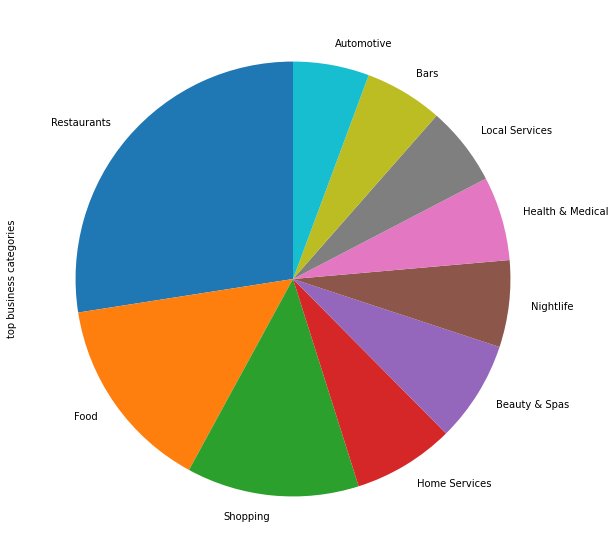

In [18]:
categories = find_specific_category(business,'categories',10,'top business categories')

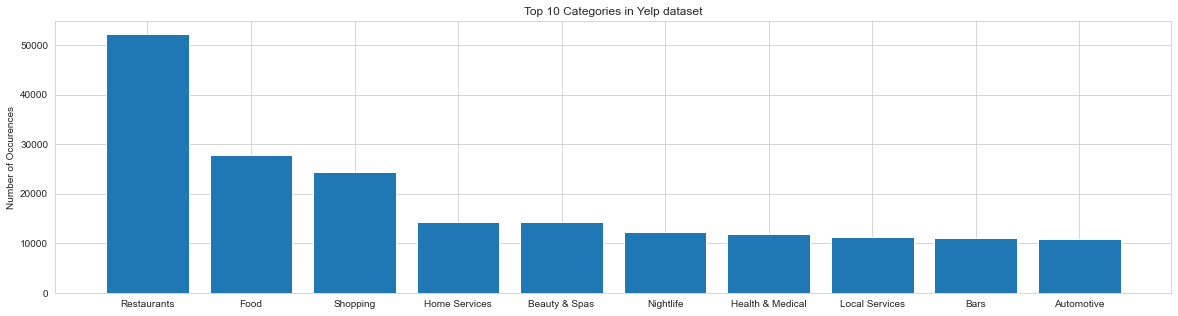

In [89]:
cat = categories
cat= cat.sort_values(by = 'occurance', ascending = False)
cat = cat[0:10]
objects = list(cat.category)
y_pos = np.arange(len(objects))
Numbers = list(cat.occurance)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Categories in Yelp dataset')
plt.show()

Based on figure above, restaurant is found to be the highest occurance and followed by food. These two is potentially selected as area of focus for this study as they contain greater variety of category of industry

In [101]:
categories.sort_values(by=['occurance'],ascending=False)

,category,occurance
17,Restaurants,34749
18,Food,18517
12,Shopping,16277
135,Home Services,9622
107,Beauty & Spas,9504
...,...,...
1229,Nudist,1
1228,Aircraft Dealers,1
1226,Hepatologists,1
1128,Ski Schools,1


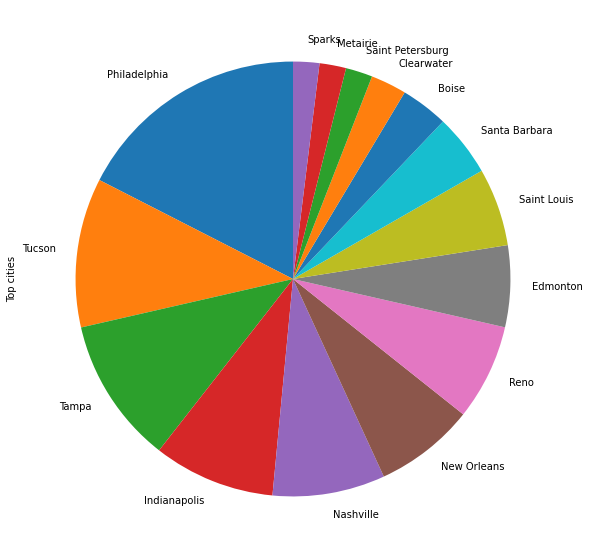

In [19]:
## top cities
cities = find_specific_category(business,"city",15,"Top cities")

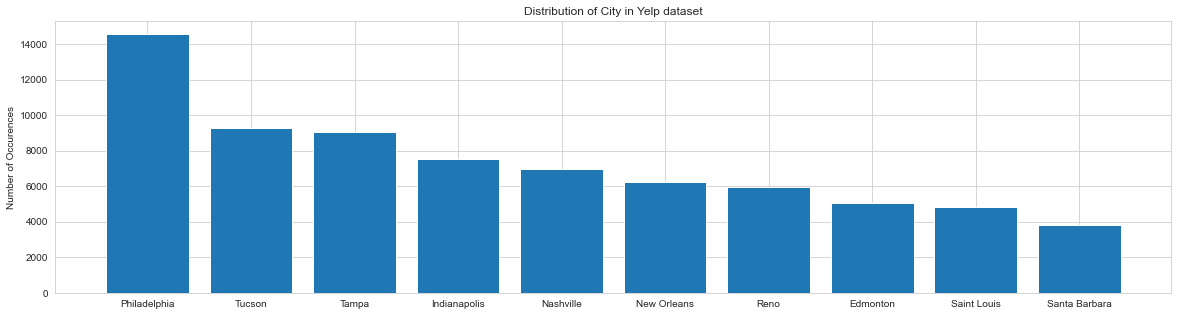

In [88]:
cat = cities
cat= cat.sort_values(by = 'occurance', ascending = False)
cat = cat[0:10]
objects = list(cat.category)
y_pos = np.arange(len(objects))
Numbers = list(cat.occurance)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of City in Yelp dataset')
plt.show()

 + Above diagram strongly suggest that Philadelphia is the most active city in the dataset.
 + So area of focus would be Philadephia with restaurant and food industry

In [21]:
# narrow done EDA on specific top 1 category and city
restaurants = (business["categories"].str.find("Restaurants")>=0)

In [22]:
# save to dataframe business of  the filtered restaurant category
business = business[restaurants]

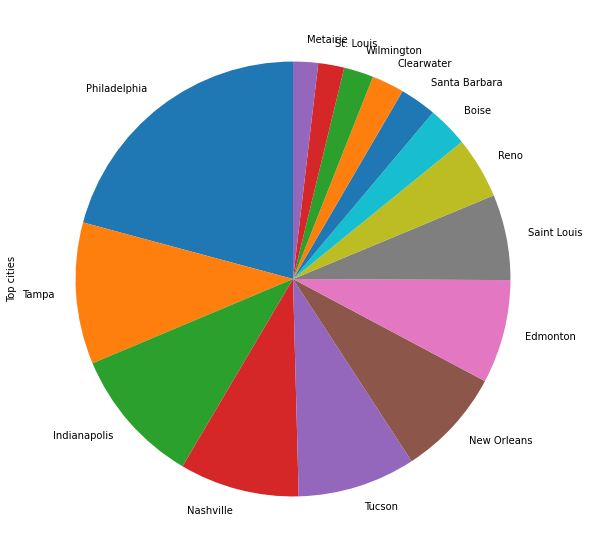

In [23]:
#find cities that has the highest selected category business
cities_df = find_specific_category(business,"city",15,"Top cities")

Text(0.5, 1.0, 'top review counts')

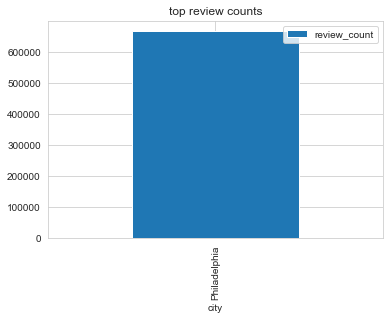

In [90]:
## restaurant review counts by city
review_count = business.groupby("city", as_index=False)["review_count"].agg(sum).sort_values(by = "review_count", ascending = False)
top_reviews = review_count.iloc[:10]
top_reviews = top_reviews.set_index("city")
top_reviews.plot.bar()
plt.title("top review counts")

In [27]:
# for simplicity choose only the highest review count's city
# narrow done EDA on specific top 1 category and city
business = business[business['city']=='Philadelphia']

In [29]:
business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."


# 2.0 Review Dataframe

In [30]:
#check dataframe contain null values
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [31]:
# check datatypes
review.dtypes

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

In [33]:
# check star value that is unique
review.stars.unique()

array([3., 5., 4., 1., 2.])

In [34]:
# check for model sparsity
n_users = review.user_id.unique().shape[0]
n_items = review.business_id.unique().shape[0]

print('Number of users: {}'.format(n_users))
print('Number of models: {}'.format(n_items))
print('Sparsity: {:4.3f}%'.format(float(review.shape[0]) / float(n_users*n_items) * 100))

Number of users: 895930
Number of models: 45055
Sparsity: 0.005%


In [36]:
# checking if there are duplicate reviews using business id and user id
duplicate_review = review.groupby(['business_id','user_id']).agg(['count']).reset_index()
duplicate_review.head(3)

,business_id,user_id,review_id,stars,useful,funny,cool,text,date
,,,count,count,count,count,count,count,count
0,---kPU91CF4Lq2-WlRu9Lw,415SXXbQrl2-VudHa3ImbQ,1,1,1,1,1,1,1
1,---kPU91CF4Lq2-WlRu9Lw,5jlO2REcgB6GKFeSsc-OXw,1,1,1,1,1,1,1
2,---kPU91CF4Lq2-WlRu9Lw,5r_jlIQvSr7VG5YFbhU6nw,1,1,1,1,1,1,1


# 3. Merge Dataframe

In [37]:
# combine business and review df as df_merge 
df_merge = pd.merge(business, review, how = "left", on ="business_id")
df_merge.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4.0,0.0,0.0,1.0,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4.0,3.0,1.0,2.0,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5.0,0.0,0.0,0.0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57


In [38]:
#check null values of combined df(dataframe)
df_merge.isna().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars_x            0
review_count       0
is_open            0
attributes       120
categories         0
hours           8187
review_id       4072
user_id         4072
stars_y         4072
useful          4072
funny           4072
cool            4072
text            4072
date            4072
dtype: int64

In [39]:
#remove null value
df_merge.dropna(inplace=True)

In [40]:
#change df_merge name to df for easier write of coding
df = df_merge
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [41]:
# rename clashed/redundant column names respectively
df.rename(columns={'stars_x':'biz_stars','stars_y':'stars','name':'biz_name'},inplace=True)

In [42]:
# drop unuseful column
# drop date as this review is assume not affected by date
df.drop(columns = ['funny', 'cool','date'],inplace=True)

In [43]:
#check datatypes of df
df.dtypes

business_id      object
biz_name         object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
biz_stars       float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
review_id        object
user_id          object
stars           float64
useful          float64
text             object
dtype: object

In [50]:
#create backup of df dataframe
df_backup = df

# 4. Text EDA

In [59]:
Five_star = df[df['stars'] == 5.0]
Five_star_order = Five_star.biz_name.value_counts()
Five_star_order = Five_star_order.to_frame().reset_index()
Five_star_order.columns = ['Restaurant', 'Counts']

In [60]:
Five_star_order = Five_star_order.head(10)
Five_star_order = Five_star_order.sort_values(['Counts'], ascending = True)
Five_star_order

,Restaurant,Counts
9,Fogo de Chao,733
8,Butcher and Singer,791
7,Suraya,798
6,Terakawa Ramen,885
5,John's Roast Pork,1015
4,Amada,1074
3,Sabrina's Caf├й,1226
2,Parc,1320
1,DalessandroтАЩs Steaks & Hoagies,1381
0,Zahav,2038


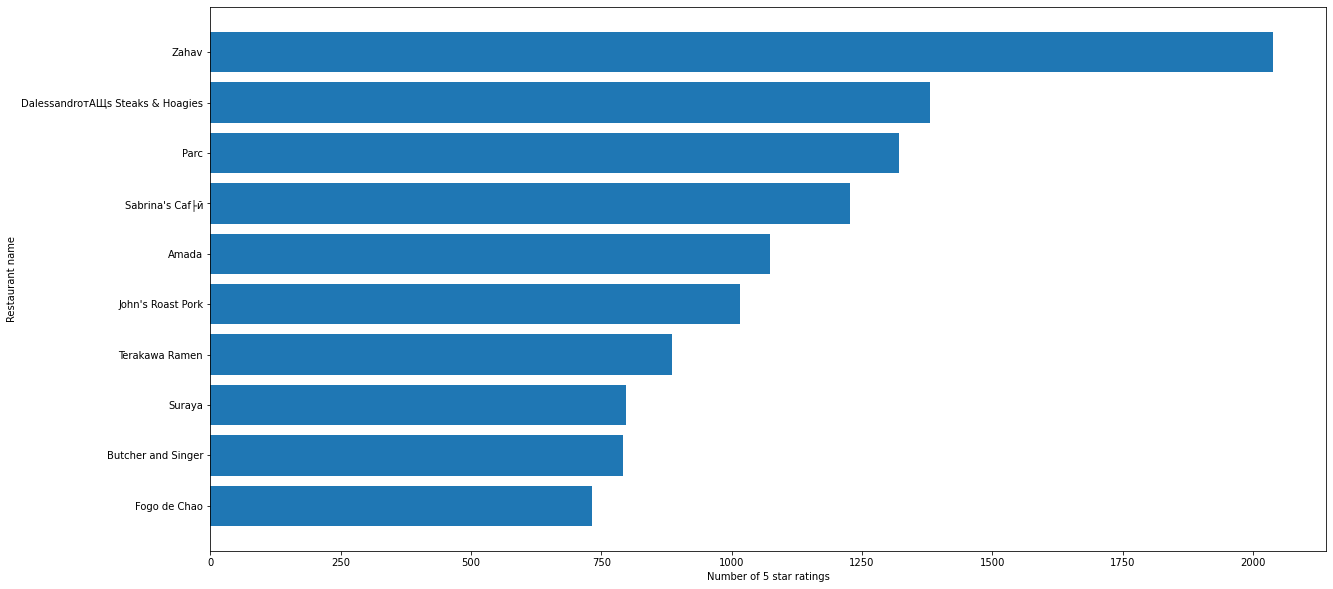

In [61]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(Five_star_order.Restaurant, Five_star_order.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.show()

Above figure show top restaurant with 5 star rating in Philadelphia

In [70]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from stop_words import get_stop_words
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize, word_tokenize
import re
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
df['text'] = df.text.str.replace("[^\w\s]", "").str.lower()

C:\Users\User\AppData\Local\Temp\ipykernel_29056\2890017786.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df.text.str.replace("[^\w\s]", "").str.lower()


In [64]:
df['text'] = df['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [65]:
# creating bag of words of all the text
bag_of_words = df['text'].str.lower().str.cat(sep=' ')

In [66]:
bag_of_words = re.sub('[^A-Za-z]+', ' ', bag_of_words)

In [71]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(bag_of_words)

In [72]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [73]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 3]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

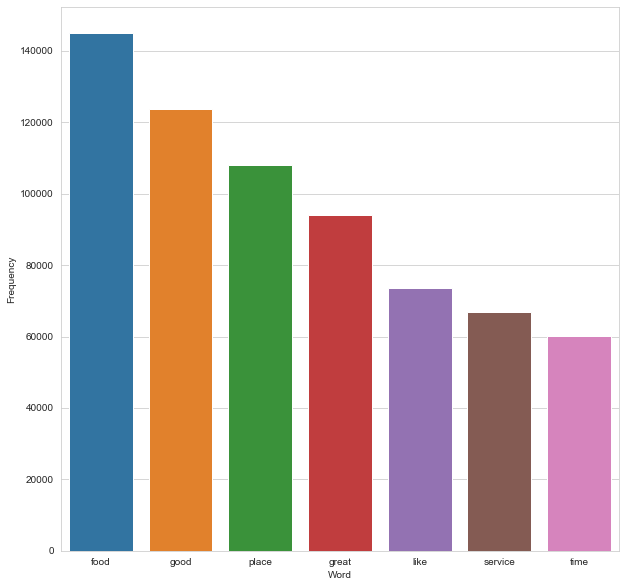

In [74]:
top_N = 100
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

Above figure show frequently use word for top 5 star rating restaurant

In [86]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (70,70))
    wc = WordCloud(background_color = bgcolor, max_words = 200,  max_font_size = 20)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [91]:
wc(cleaned_data_title,'black','Most Used Words')

MemoryError: 

<Figure size 5040x5040 with 0 Axes>